## Bibliotecas Básicas ##

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

## Pré - Processamento
### Base de dados com todos os óbitos identificado por COVID-19 


df_n_covid possui os dados obtidos junto ao da Ministério da Saúde
    com os Óbitos totais notificados por COVID-19, agregando dados notificados pelos municípios e estados.

In [75]:
df_n_covid = pd.read_csv('./dataset/n_covid.csv', encoding='ISO-8859-1', delimiter=';', error_bad_lines=False)

In [76]:
df_n_covid.sample(5)


,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
386710,Nordeste,CE,Fortim,23,230445.0,23007.0,7Âª REGIAO ARACATI,2020-07-17,29,16480.0,105,1,0,0,NaN,NaN,0.0
423956,Nordeste,CE,Russas,23,231180.0,23009.0,9Âª REGIAO RUSSAS,2020-07-23,30,78194.0,1911,23,42,1,NaN,NaN,0.0
1424019,Sudeste,SP,Mairinque,35,352840.0,35163.0,SOROCABA,2020-10-02,40,47150.0,483,6,20,1,NaN,NaN,0.0
398176,Nordeste,CE,ItapiÃºna,23,230650.0,23004.0,4Âª REGIAO BATURITE,2020-10-23,43,20382.0,365,1,12,0,NaN,NaN,0.0
1964974,Sul,RS,Salvador das MissÃµes,43,431647.0,43011.0,REGIAO 11,2020-09-27,40,2733.0,15,0,0,0,NaN,NaN,0.0


In [77]:
#Verifica se tem NaN na target "obitosAcumulados"
hasNan = df_n_covid['obitosAcumulado'].isnull().values.any()
print(hasNan)

False


Exibe o total óbitos no Brasil e Regiões. Foi realizado o agrupamento dos óbitos, somando os valores totais e exibindo em ordem decrescente.

In [78]:
obito_regiao = df_n_covid.groupby('regiao')['obitosAcumulado'].max().sort_values(ascending=False)

<AxesSubplot:xlabel='regiao'>

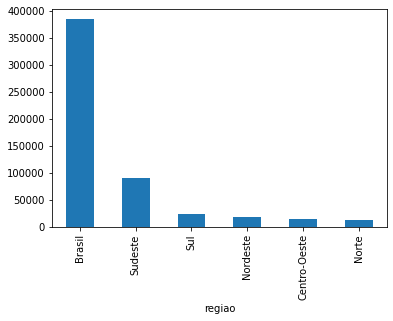

In [79]:
obito_regiao.plot(kind='bar')

In [80]:
df_n_covid.shape

(2203518, 17)

### Base de dados com informações de óbitos por SARG


Óbitos totais notificados por SRAG em 2019. Obtidos no openDATASUS  do Ministério da Saúde.

In [89]:
df_n_sarg_2019 = pd.read_csv('./dataset/n_sarg_2019.csv',low_memory=False, encoding='ISO-8859-1', delimiter=';', error_bad_lines=False)

In [90]:
df_n_sarg_2019.shape

(48528, 139)

In [91]:
df_n_sarg_2019.describe


<bound method NDFrame.describe of        DT_NOTIFIC  SEM_NOT  DT_SIN_PRI  SEM_PRI SG_UF_NOT  \
0      10/01/2019        2  06/01/2019        2        MG   
1      03/01/2019        1  01/01/2019        1        SP   
2      02/01/2019        1  31/12/2018        1        PE   
3      10/01/2019        2  07/01/2019        2        SP   
4      11/01/2019        2  06/01/2019        2        PE   
...           ...      ...         ...      ...       ...   
48523  12/12/2019       50  09/12/2019       50        BA   
48524  05/11/2019       45  23/10/2019       43        PA   
48525  11/04/2020       15  26/12/2019       52        SP   
48526  31/10/2019       44  29/10/2019       44        BA   
48527  08/04/2020       15  01/12/2019       49        ES   

                              ID_REGIONA  CO_REGIONA      ID_MUNICIP  \
0                         BELO HORIZONTE      1449.0  BELO HORIZONTE   
1                          GVE I CAPITAL      1331.0       SAO PAULO   
2                

In [92]:
df_n_sarg_2019.sample(5)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,...,CO_LAB_IF,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,LAB_PCR,CO_LAB_PCR,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,OBSERVA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO
15664,22/05/2019,21,02/05/2019,18,SC,FLORIANOPOLIS,1476.0,FLORIANOPOLIS,420540,IMPERIAL HOSPITAL DE CARIDADE,19402,F,21/03/1948,71,3,3071,5,1.0,NaN,2.0,BRASIL,1.0,SC,1476.0,FLORIANOPOLIS,420540.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,QUEDA DO ESTADO GERAL,...,NaN,1.0,02/05/2019,1.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LACEN LABORATORIO CENTRAL DE SAUDE PUBLICA LACEN,2409232.0,1.0,NaN,1.0,1.0,04/05/2019,22/05/2019,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36791,23/08/2019,34,21/08/2019,34,MG,UBERLANDIA,1462.0,UBERLANDIA,317020,HOSPITAL SANTA CLARA,2151871,M,13/06/2019,2,2,2002,6,1.0,NaN,5.0,BRASIL,1.0,MG,1462.0,UBERLANDIA,317020.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,NaN,...,NaN,2.0,23/08/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,27/08/2019,05/09/2019,NaN,28/08/2019,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17958,29/05/2019,22,25/05/2019,21,DF,NaN,NaN,BRASILIA,530010,HOSPITAL UNIVERSITARIO DE BRASILIA,10510,M,19/05/2019,6,1,1006,6,9.0,NaN,5.0,BRASIL,1.0,DF,NaN,BRASILIA,530010.0,1.0,9.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,RINORREIA ABUNDANTE,...,NaN,1.0,29/05/2019,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,09/06/2019,21/06/2019,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43359,29/10/2019,44,24/10/2019,43,SP,GVE XVII CAMPINAS,1342.0,CAMPINAS,350950,HOSPITAL DAS CLINICAS DA UNICAMP DE CAMPINAS,2079798,M,29/08/2019,2,2,2002,6,2.0,NaN,5.0,BRASIL,1.0,SP,1350.0,CASA BRANCA,351080.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,...,NaN,2.0,29/10/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,31/10/2019,17/03/2020,NaN,30/10/2019,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20291,16/04/2019,16,14/04/2019,16,DF,NaN,NaN,BRASILIA,530010,HOSPITAL SANTA HELENA,3019608,F,05/03/2019,1,2,2001,6,1.0,NaN,5.0,BRASIL,1.0,DF,NaN,BRASILIA,530010.0,1.0,2.0,2.0,9.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,...,NaN,1.0,16/04/2019,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,26/04/2019,26/04/2019,NaN,07/06/2019,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df_n_pneumonia_2019 = pd.read_csv('./dataset/n_pneumonia_2019.csv', encoding='ISO-8859-1', delimiter=';', error_bad_lines=False)

In [100]:
df_n_pneumonia_2019.sample(10)

,"uf,tipo_doenca,local_obito,faixa_etaria,sexo,total"
2018,"MS,INSUFICIENCIA_RESPIRATORIA,VIA_PUBLICA,""20 ..."
11869,"GO,OUTRAS,DOMICILIO,N/I,F,4"
3513,"AL,INSUFICIENCIA_RESPIRATORIA,DOMICILIO,""40 - ..."
7603,"MS,SEPTICEMIA,DOMICILIO,""70 - 79"",F,4"
5599,"SC,SEPTICEMIA,HOSPITAL,""50 - 59"",M,286"
11031,"CE,INSUFICIENCIA_RESPIRATORIA,OUTROS_SERVICOS_..."
12346,"SE,OUTRAS,OUTROS_SERVICOS_SAUDE,N/I,F,1"
3642,"CE,OUTRAS,DOMICILIO,""40 - 49"",F,106"
8790,"GO,SEPTICEMIA,OUTROS_SERVICOS_SAUDE,""80 - 89"",..."
8649,"DF,OUTRAS,OUTRO,""80 - 89"",M,7"


In [99]:
df_n_pneumonia_2019.groupby('tipo_doenca')['PNEUMONIA'].value_counts()

KeyError: 'tipo_doenca'